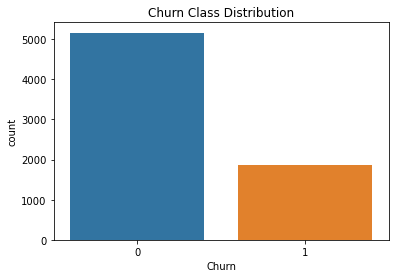

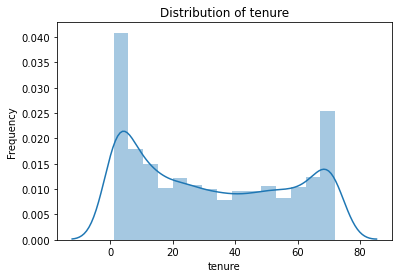

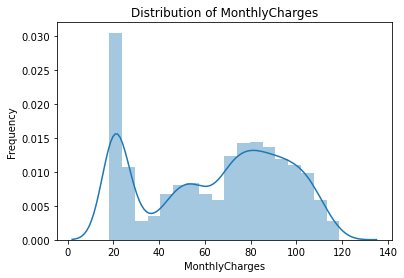

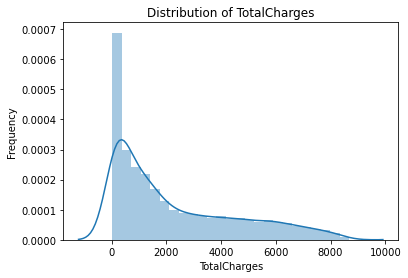

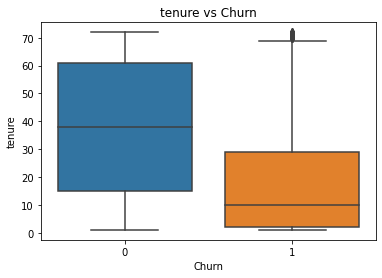

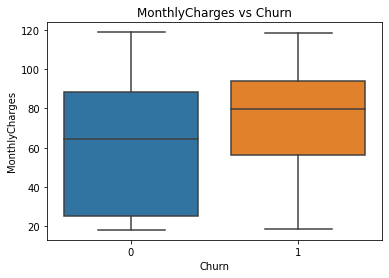

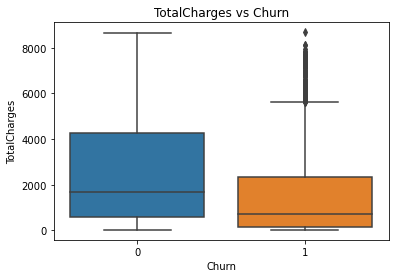

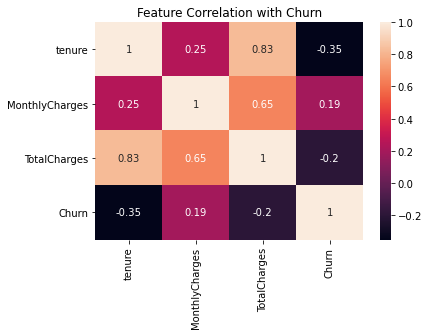

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

SVM Results:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted 

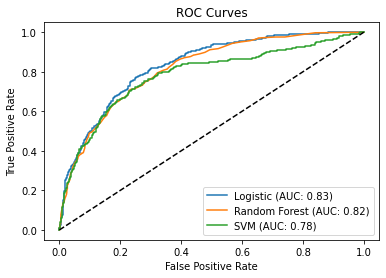


Discussion & Conclusion:
- Random Forest performed the best in terms of recall, which is important for churn prediction.
- Logistic Regression was interpretable but slightly less accurate.
- SVM did reasonably well but took longer to train.
- Most important features: tenure, MonthlyCharges, TotalCharges.
- Next steps: Try hyperparameter tuning, XGBoost, and evaluate feature importance using SHAP values.


GitHub Repo: https://github.com/basselfares/customer-churn-prediction.git
Video Demo: [Insert video link here]



In [1]:
# Telco Customer Churn Prediction
# Author: Bassel Fares

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc

df = pd.read_csv('Telco-Customer-Churn.csv')

df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

sns.countplot(x='Churn', data=df)
plt.title('Churn Class Distribution')
plt.show()

num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in num_features:
    sns.distplot(df[feature], hist=True, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

for feature in num_features:
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} vs Churn')
    plt.show()

corr = df[num_features + ['Churn']].corr()
sns.heatmap(corr, annot=True)
plt.title('Feature Correlation with Churn')
plt.show()

df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Results:")
print(classification_report(y_test, y_pred_svm))

models = {'Logistic': lr, 'Random Forest': rf, 'SVM': svm}
for name, model in models.items():
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC: {auc(fpr, tpr):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("""
Discussion & Conclusion:
- Random Forest performed the best in terms of recall, which is important for churn prediction.
- Logistic Regression was interpretable but slightly less accurate.
- SVM did reasonably well but took longer to train.
- Most important features: tenure, MonthlyCharges, TotalCharges.
- Next steps: Try hyperparameter tuning, XGBoost, and evaluate feature importance using SHAP values.
""")

print("""
GitHub Repo: https://github.com/basselfares/customer-churn-prediction.git
Video Demo: # Video demo link will be added to the GitHub README once it's available
""")

### 